# Titanic Survival Prediction with Python

 ## Importing the packages and libraries

In [34]:
#lets load the required packages and libraries for data analysis
import numpy as np 
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading and exploring the data

In [35]:
#importing the training and test datasets
train_df = pd.read_csv('/Users/poorn/OneDrive/Desktop/train.csv')

test_df = pd.read_csv('/Users/poorn/OneDrive/Desktop/test.csv')

In [36]:
#lets take a look at our training data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Now the test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
# lets see what kind of data we have to work with
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data analysis

In [14]:
#printing out a list of all the columns in our training dataset
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

###### Types of features :

'''Categorical : Pclass, Sex, Embarked, Survived
Continuous : Age, Fare, Sibsp, Parch, PassengerId
Alphanumeric: Ticket, Cabin, Name'''

In [19]:
#printing summary statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###### Observations from above summary statistics:

'''There are a total of 891 passengers in our training dataset.

Since the Survived column has dicrete data, the mean gives us the number of people survived from 891 i.e. 38%.

Most people belonged to Pclass = 3

The maximum Fare paid for a ticket was 512 however the fare prices varied a lot as we can see from the standard deviation of 49
'''

In [28]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [29]:
#Finding the percantage of missing values in train dataset
train_df.isnull().sum()/len(train_df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [30]:
#Finding the percentage of Null values in test dataset
test_df.isnull().sum()/ len(test_df) *100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

## Visual Data Analysis

#### Sex feature

Sex
male      577
female    314
Name: count, dtype: int64

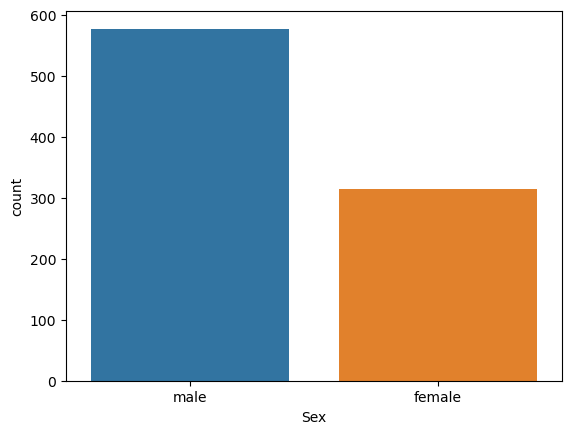

In [47]:
sns.countplot(x ='Sex', data = train_df)
train_df['Sex'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


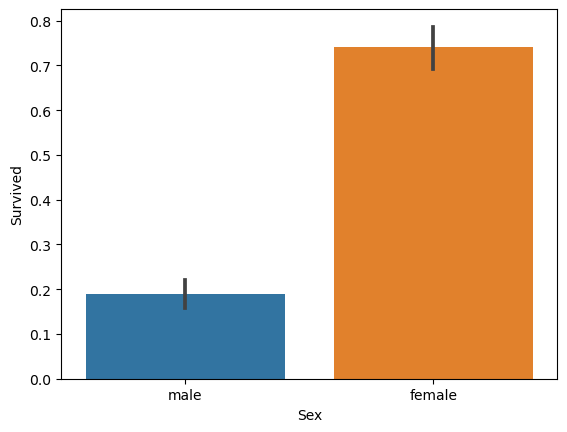

In [37]:
#Comparing the Sex feature against Survived
sns.barplot(x='Sex',y='Survived',data=train_df)
train_df.groupby('Sex',as_index=False).Survived.mean()

#### As one would assume the number of female who survived was much more than the males who survived i.e. 74%                              females as against to 18% males

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


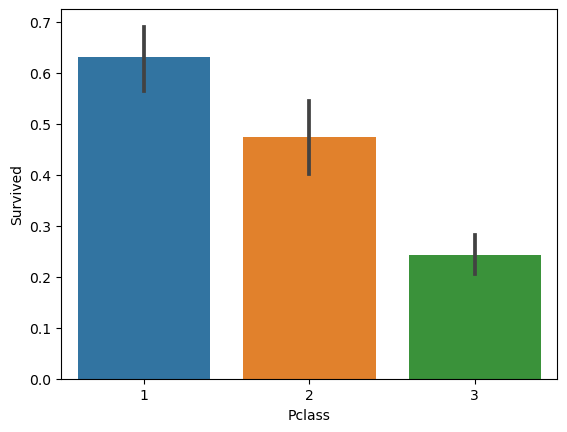

In [55]:
# How did the Class of each passenger affect their survival?

#Comparing the Pclass feature against Survived
sns.barplot(x='Pclass',y='Survived',data=train_df)
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

##### Clearly Class had an effect on survival of each passenger with the percentages of survival being 62.96%, 47.28%, 24.23% for Pclass 1, 2 and 3 respectively. Thus, belonging to Pclass = 1 had a huge advantage.

##### Did the port from which the passengers embarked have an effect on their Survival?

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


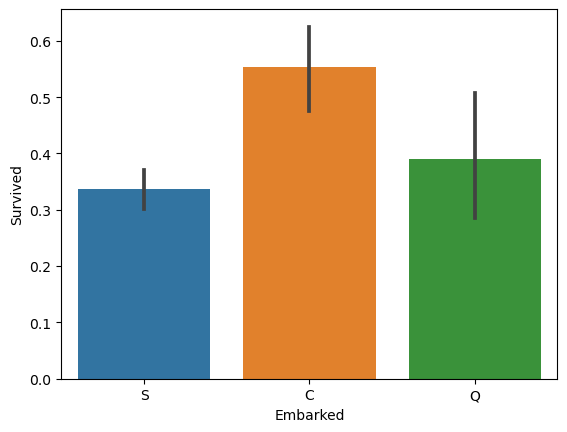

In [62]:
#Comparing the Embarked feature against Survived
sns.barplot(x='Embarked', y='Survived',data=train_df)
train_df[["Embarked","Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending =False)

##### It seems that the passengers that embarked from port Cherbourg had a higher rate of Survival at 55%. This could be either due to their Sex or socio-economic class. Let's move forward to see the effect of having parents or children on-board.

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


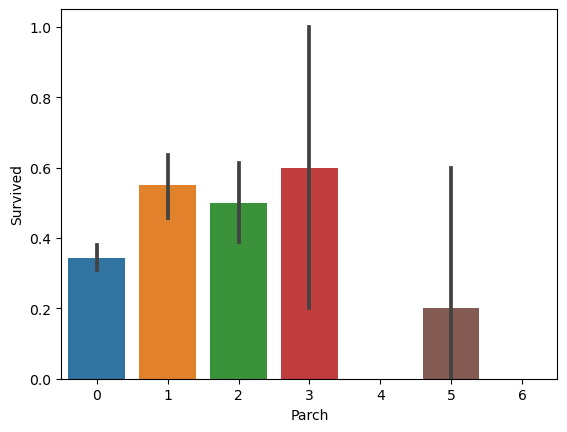

In [63]:
sns.barplot(x='Parch',y='Survived',data=train_df)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

###### Looks like passengers who had either 1, 2 or 3 had a higher possibility of surviving than the ones had none. However having more than 3 made the possibility even lesser. Moving on to the effect of having spouse or siblings on Survival:

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


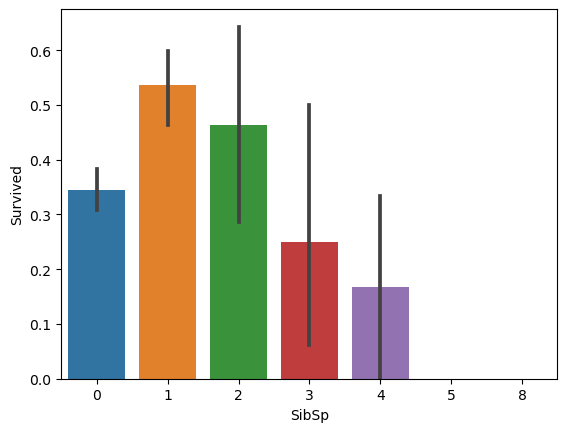

In [64]:
sns.barplot(x='SibSp',y='Survived',data=train_df)
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

###### It seems that having a spouse or 1 sibling had a positive effect on Survival as compared to being alone. Though the chances of survival go down with the number of siblings after 1.

In [66]:
# The Age column has some missing values. We will take care of that later when we clean our training data. First we shall proceed by:

# Plotting a histogram of the age values .
# Taking a look at the median value of age as well as the spread.

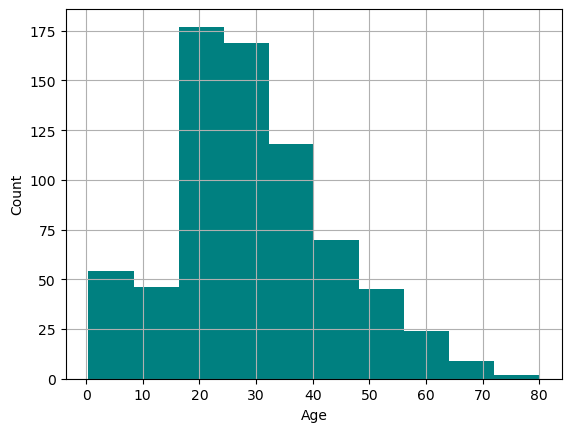

The Median age of passengers is : 28
The Standard Deviation age of passengers is : 14


In [68]:
train_df.Age.hist(bins=10,color='teal')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Median age of passengers is :", int(train_df.Age.median()))
print("The Standard Deviation age of passengers is :", int(train_df.Age.std()))

###### It is obvious to assume that younger individuals were more likely to survive, however we should test our assumption before we proceed.

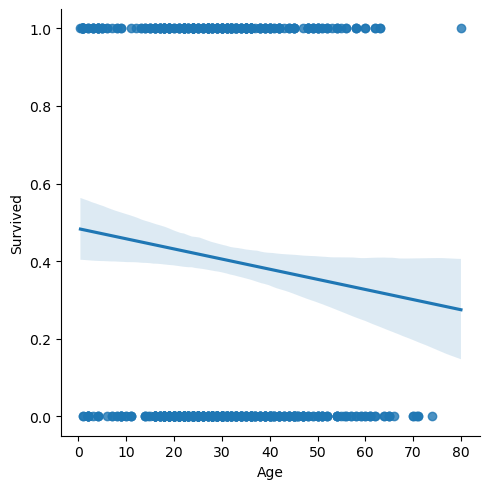

In [69]:
sns.lmplot(x='Age',y='Survived',data=train_df,palette='Set1')

In [70]:
# Our assumption was right, younger individuals were more likely to survive.

##### From the sex column we saw that there was a significant difference in the percentage of men and women that survived. Does sex also play a role when it comes to surviving the disaster along with the age?

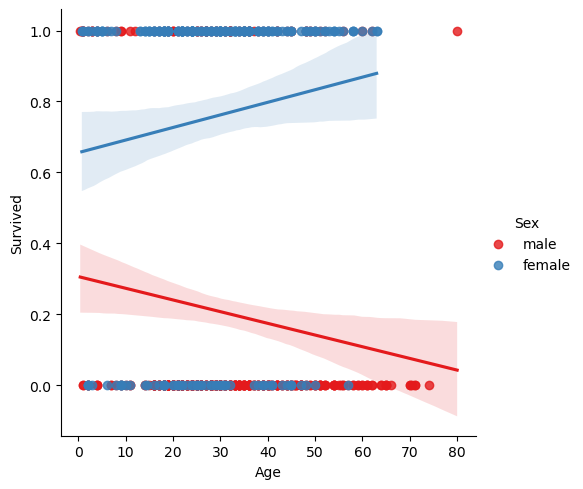

In [71]:
sns.lmplot(x='Age',y='Survived',data=train_df,hue='Sex',palette='Set1')

##### Interestingly, age has an opposite effect on the survival in men and women. The chances of survival increase as the age of women increases.

##### Takeaway: Age feature can have a different effect on the outcome depending on the sex of the passenger. Perhaps we can use this information in feature engineering

,Sex,Age
0,female,28.0
1,male,28.0


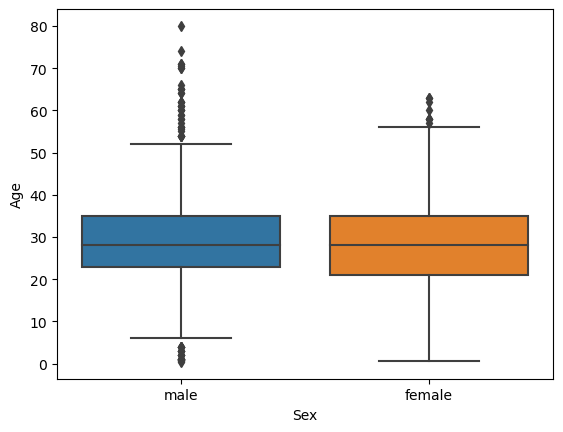

In [115]:
#Checking for outliers in Age data
sns.boxplot(x='Sex',y='Age',data=train_df)

#getting the median age according to Sex
train_df.groupby('Sex',as_index=False)['Age'].median()

Mean value of Fare is : 32.204207968574636
Median value of Fare is : 14.4542


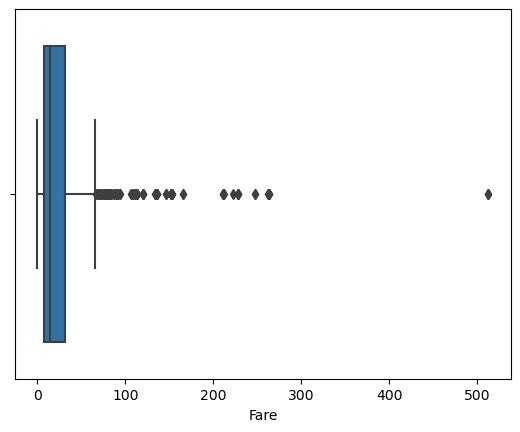

In [78]:
#plotting the Fare column to see the spread of data
sns.boxplot(x="Fare",data=train_df)

#Checking the mean and median values
print("Mean value of Fare is :",train_df.Fare.mean())
print("Median value of Fare is :",train_df.Fare.median())

## Cleaning Data :

In [79]:
# Now that we have visualized our data , 
# we can proceed to fill in the NaN values in our test and train datasets and drop the columns that we will not require

In [80]:
#let's start off by dropping the coulmns we will not be needing
drop_list=['Cabin','Ticket','PassengerId']

train_df = train_df.drop(drop_list,axis=1)
test_passenger_df = pd.DataFrame(test_df.PassengerId)
test_df = test_df.drop(drop_list,axis=1)

test_passenger_df.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [83]:
# Now, let's fill in the missing values for Embarked column in the training dataset. 
# Most people embarked on their journey from Southhampton port. Hence, we will be filling the two missing values with "S"

In [85]:
#filling the missing Embarked values in train and test datasets
train_df.Embarked.fillna('S',inplace=True)

In [86]:
# We will replace the NaN values in the age column with the median age

In [87]:
#filling the missing values in the Age column
train_df.Age.fillna(28, inplace=True)
test_df.Age.fillna(28, inplace=True)

In [88]:
# There is a small fraction of fare values missing in the fare column which we will fill using the median value 
#since there a plenty of outliers in the data.

In [89]:
#Filling the null Fare values in test dataset
test_df.Fare.fillna(test_df.Fare.median(), inplace=True)

## Feature Engineering

In [ ]:
# Title Feature The name column might not be useful to us directly but a lot of names have titles like Mr, Mrs, Lady, etc which might indicate the individual's status in the society which can affect the chance of survival.

In [90]:
# We shall try to extract a Title feature form the name column which might improve the performanc of our model.

In [92]:
#combining train and test dataframes to work with them simultaneously
combining_data = [train_df,test_df]

In [ ]:
#extracting the various title in Names column
for dataset in Combined_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#Plotting the various titles extracted from the names    
sns.countplot(y='Title',data=train_df)

In [102]:
# There are some titles that are very rare like Capt and Lady. It would be better to group such titles under one name know as 'rare'. Some titles also seem to be incorrectly spelled. They also need to be rectified.


#Refining the title feature by merging some titles
for dataset in Combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')

    dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    
train_df.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,3.0,0.792000
2,2.0,0.697802
4,4.0,0.575000
0,0.0,0.444444
1,1.0,0.156673


<Axes: xlabel='count', ylabel='Title'>

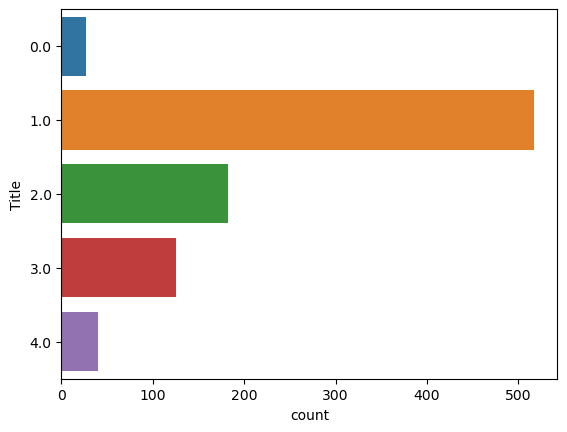

In [105]:
#Now lets see the distribution of the title feature
sns.countplot(y='Title',data=train_df)

In [106]:
#Mapping the title names to numeric values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
for dataset in Combined_data:
    dataset['Title'] = dataset.Title.map(title_mapping)
    dataset['Title'] = dataset.Title.fillna(0)

In [97]:
# Getting rid of the columns that are not required anymore:

In [98]:
#dropping the Name,SibSP and Parch columns
for dataset in Combined_data:
    dataset.drop(['SibSp','Parch','Name'],axis=1,inplace=True)

###### Age had big role to play when it came to survival. Clearly younger people were more likely to survive. Hence, it should be worth considering a feature IsMinor for the passengers under the age of 15.

In [99]:
#Creating another feature if the passenger is a child
for dataset in Combined_data:
    dataset["IsMinor"] = np.where(dataset["Age"] < 15, 1, 0)

##### Older female passengers also had a higher chance of survival. Let's create a feature name Old_female that would account for women older then 50 years on board

In [100]:
train_df['Old_Female'] = (train_df['Age']>50)&(train_df['Sex']=='female')
train_df['Old_Female'] = train_df['Old_Female'].astype(int)

test_df['Old_Female'] = (test_df['Age']>50)&(test_df['Sex']=='female')
test_df['Old_Female'] = test_df['Old_Female'].astype(int)

###### Pclass, Sex and Embarked are the categorical features in our data. we can convert these categorucal variables into dummy variables using the get_dummies method in python

In [101]:
#Converting categorical variables into numerical ones
train_df2 = pd.get_dummies(train_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
test_df2 = pd.get_dummies(test_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
train_df2.head()

,Survived,Age,Fare,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1.0,0,0,0,False,True,True,False,True
1,1,38.0,71.2833,3.0,0,0,0,False,False,False,False,False
2,1,26.0,7.9250,2.0,1,0,0,False,True,False,False,True
3,1,35.0,53.1000,3.0,0,0,0,False,False,False,False,True
4,0,35.0,8.0500,1.0,1,0,0,False,True,True,False,True


##### Age and Fare columns have continuous data and there might be fluctuations that do not reflect patterns in the data, which might be noise. That's why wel put people that are within a certain range of age or fare in the same bin. This can be achieved using qcut method in pandas

In [108]:
#creating Age bands
train_df2['AgeBands'] = pd.qcut(train_df2.Age,4,labels=False) 
test_df2['AgeBands'] = pd.qcut(test_df2.Age,4,labels=False) 

In [ ]:
#creating Fare bands
train_df2['FareBand'] = pd.qcut(train_df2.Fare,7,labels=False)
test_df2['FareBand'] = pd.qcut(test_df2.Fare,7,labels=False)

In [110]:
#Dropping the Age and Fare columns
train_df2.drop(['Age','Fare'],axis=1,inplace=True)
test_df2.drop(['Age','Fare'],axis=1,inplace=True)

In [112]:
# Let's take a final look at our training and testing data before we proceed to build our model.

In [113]:
train_df2.head()
#sns.barplot('AgeBands','Survived',data=train_df2)


,Survived,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,0,1.0,0,0,0,False,True,True,False,True,0,0
1,1,3.0,0,0,0,False,False,False,False,False,3,6
2,1,2.0,1,0,0,False,True,False,False,True,1,1
3,1,3.0,0,0,0,False,False,False,False,True,2,5
4,0,1.0,1,0,0,False,True,True,False,True,2,1


In [114]:
test_df2.head()

,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,1.0,1,0,0,False,True,True,True,False,2,1
1,3.0,0,0,0,False,True,False,False,True,3,0
2,1.0,1,0,0,True,False,True,True,False,3,2
3,1.0,1,0,0,False,True,True,False,True,1,2
4,3.0,0,0,0,False,True,False,False,True,0,2


##                                 Thank you